
Available classes:
1. mastitis
2. blackleg
3. bloat
4. coccidiosis
5. cryptosporidiosis
6. displaced_abomasum
7. gut_worms
8. listeriosis
9. liver_fluke
10. necrotic_enteritis
11. peri_weaning_diarrhoea
12. rift_valley_fever
13. rumen_acidosis
14. traumatic_reticulitis
15. calf_diphtheria
16. foot_rot
17. foot_and_mouth
18. ragwort_poisoning
19. wooden_tongue
20. infectious_bovine_rhinotracheitis
21. acetonaemia
22. fatty_liver_syndrome
23. calf_pneumonia
24. schmallen_berg_virus
25. trypanosomosis
26. fog_fever


Enter the number corresponding to the class (1-26):  9


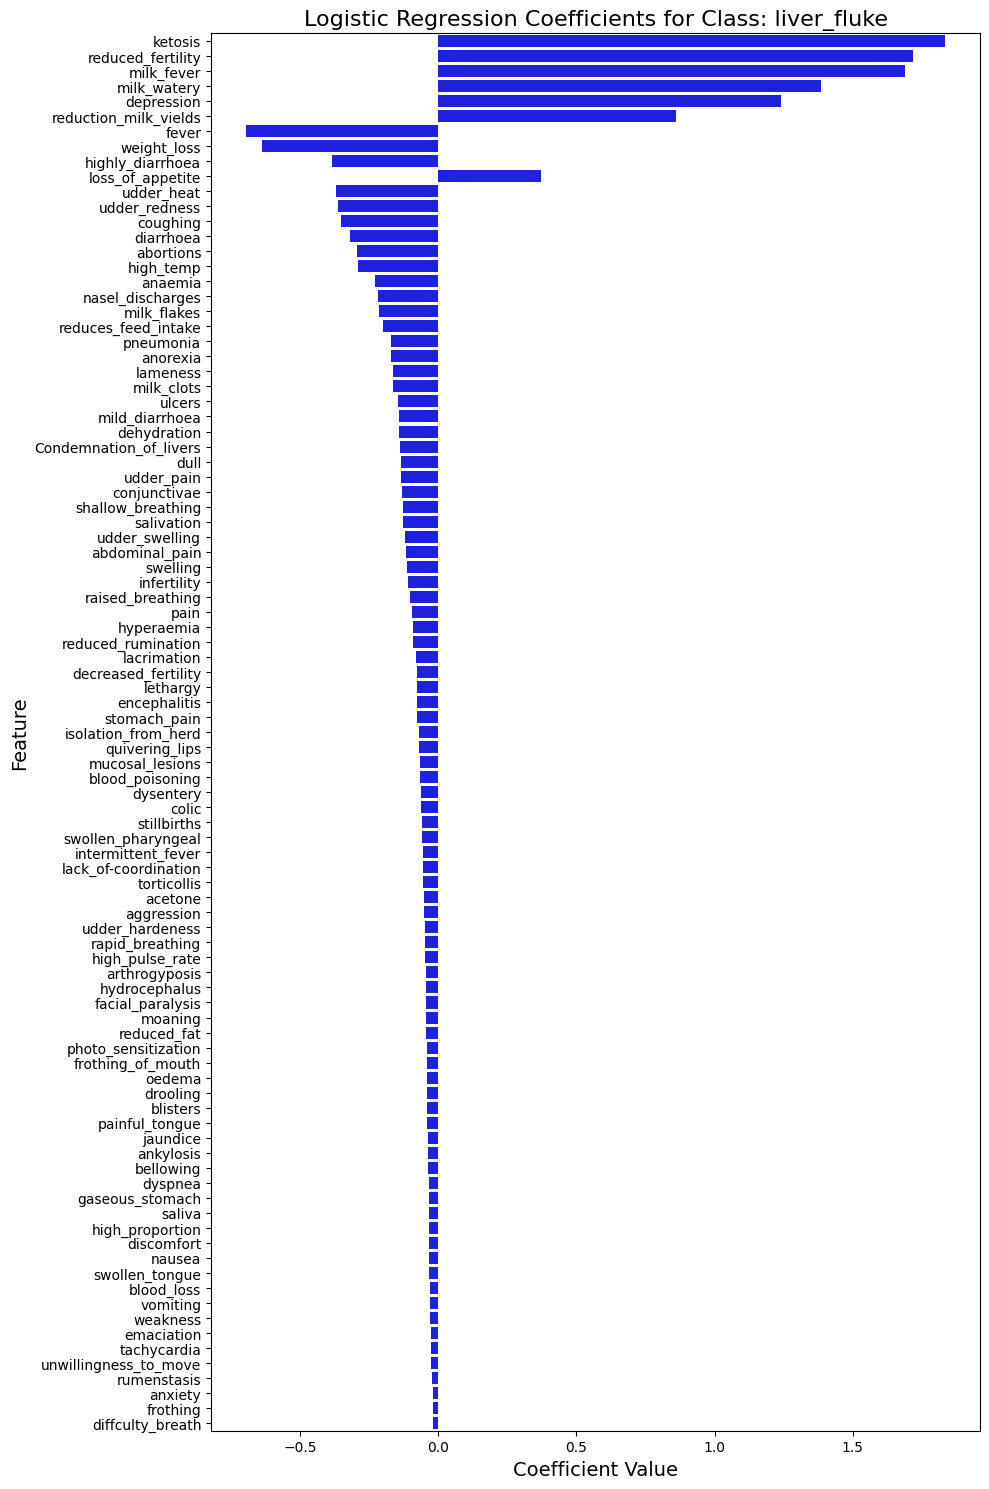

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Path to the saved logistic regression model and training data
logistic_model_path = r"C:\Users\tachy\Downloads\logistic_model.pkl"
train_path = r"C:\Users\tachy\Downloads\Training.csv"

# Load the trained Logistic Regression model
logistic_model = joblib.load(logistic_model_path)

# Load the training data
train_data = pd.read_csv(train_path)

# Prepare data (X_train contains all columns except the last one, y_train is the last column)
X_train = train_data.iloc[:, :-1]  # Features (all columns except the last one)
y_train = train_data.iloc[:, -1]   # Target (last column)

# Extract feature names from the training data
feature_names = X_train.columns.tolist()

# List of available classes (from your earlier example)
classes = y_train.unique().tolist()  # Unique class labels in the target column

# Ask the user to select a class
while True:
    try:
        print("\nAvailable classes:")
        for i, cls in enumerate(classes, 1):
            print(f"{i}. {cls}")

        choice = int(input(f"Enter the number corresponding to the class (1-{len(classes)}): "))
        if 1 <= choice <= len(classes):
            break
        else:
            print(f"Invalid choice. Please select a number between 1 and {len(classes)}.")
    except ValueError:
        print("Please enter a valid number.")

# Select the class based on user input
selected_class = classes[choice - 1]

# Get the coefficients for the selected class (logistic_model.coef_ is 2D: one row per class)
class_index = classes.index(selected_class)
coefficients = logistic_model.coef_[class_index]

# Create a DataFrame with feature names and their corresponding coefficients
weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
})

# Sort the DataFrame by the absolute value of weights for better visualization
weights_df['AbsWeight'] = weights_df['Weight'].abs()
weights_df = weights_df.sort_values(by='AbsWeight', ascending=False)

# Visualization: Plotting the coefficients for the selected class
plt.figure(figsize=(10, 15))
sns.barplot(
    x='Weight', 
    y='Feature', 
    data=weights_df, 
    color='blue'
)
plt.title(f'Logistic Regression Coefficients for Class: {selected_class}', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()
